In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [2]:
# Imports
import pandas as pd
import numpy as np

# sci-kit learn
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import data sets
dailyActivity = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

# Check
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Get size metrics
data_count = dailyActivity.shape[0] # Number of rows
col_count = dailyActivity.shape[1] # Number of columns

# Print
print(f"Number of data points: {data_count}. \nNumber of columns: {col_count}.")

Number of data points: 940. 
Number of columns: 15.


In [5]:
# Drop the ID and date columns
dailyActivity = dailyActivity.drop(['Id', 'ActivityDate'], axis = 1)

# Check
dailyActivity.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Data Exploration

In [6]:
# Overview of data types
dailyActivity.dtypes

TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [7]:
# Check for null values
dailyActivity.isnull().sum()

TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
# Dependent variable
y = dailyActivity.Calories

# Get the predictor variables
X = dailyActivity.drop(['Calories'], axis=1)

In [9]:
# Check for low variance - Initialize VarianceThreshold object
vt = VarianceThreshold(threshold = 0.1)

In [10]:
# Fit to predictor variables
vt.fit(X)

VarianceThreshold(threshold=0.1)

In [11]:
# View the variables kept
vt.get_support(indices = True)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11])

In [12]:
# Drop the columns with low variance
dailyActivity = dailyActivity.drop([dailyActivity.columns[7]], axis=1)

dailyActivity.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,25,13,328,728,1985
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,21,19,217,776,1797
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,30,11,181,1218,1776
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,29,34,209,726,1745
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,36,10,221,773,1863


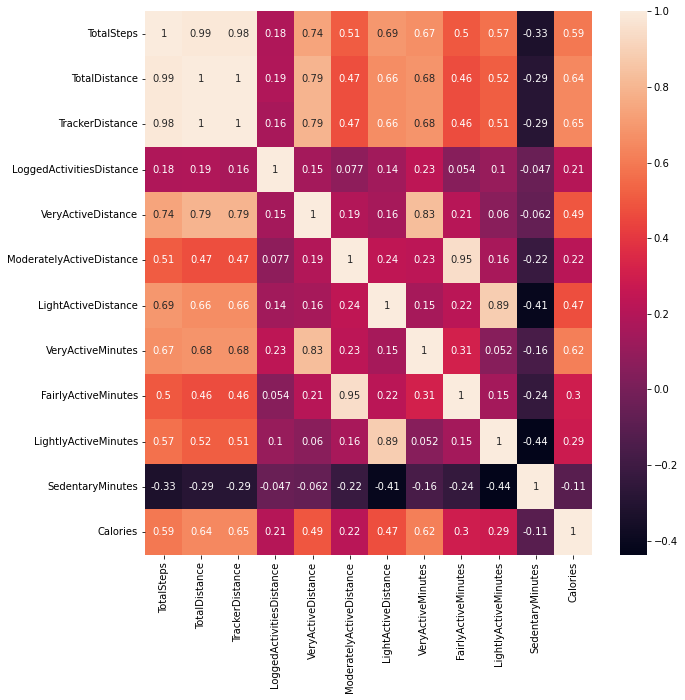

In [13]:
# See a heatmap of all the variables
plt.figure(figsize=(10,10))

# Heatmap object
sns.heatmap(dailyActivity.corr(), annot=True)

# Show figure
plt.show()

In addition to removing SedentaryActiveDistance, predictor variables with high multicollinearity should also be removed. In this case, TotalSteps, TotalDistance, and TrackerDistance all exhibit very high multicollinearity. Furthermore, two of those variables have data that is exactly the same: TotalDistance and TrackerDistance. To address this issue, the following steps are necessary:
1. Calculate VIF.
2. Drop variables starting with highest VIF.
3. Combine the dropped variables into one that makes sense for the analysis.

In [14]:
# Update the predictor variables
X = dailyActivity.drop(['Calories'], axis=1)

# Calculate the VIF
def calcVIF(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Return the vif dataframe
    return(vif) 

In [15]:
# First check
calcVIF(X)

,variables,VIF
0,TotalSteps,189.902360
1,TotalDistance,11499.681071
2,TrackerDistance,10849.046165
3,LoggedActivitiesDistance,4.145660
4,VeryActiveDistance,28.276297
5,ModeratelyActiveDistance,19.618771
6,LightActiveDistance,57.032005
7,VeryActiveMinutes,7.609467
8,FairlyActiveMinutes,18.425105
9,LightlyActiveMinutes,22.383059


In [16]:
# Drop TotalDistance
X = X.drop(['TotalDistance'], axis=1)

# Rerun to find VIF
calcVIF(X)

,variables,VIF
0,TotalSteps,179.571851
1,TrackerDistance,257.894060
2,LoggedActivitiesDistance,1.173136
3,VeryActiveDistance,26.712197
4,ModeratelyActiveDistance,19.483033
5,LightActiveDistance,56.968940
6,VeryActiveMinutes,6.688513
7,FairlyActiveMinutes,18.104691
8,LightlyActiveMinutes,22.371249
9,SedentaryMinutes,2.651758


In [17]:
# Drop TrackerDistance
X = X.drop(['TrackerDistance'], axis=1)

# Rerun to find VIF
calcVIF(X)

,variables,VIF
0,TotalSteps,72.437008
1,LoggedActivitiesDistance,1.146393
2,VeryActiveDistance,12.975831
3,ModeratelyActiveDistance,19.374761
4,LightActiveDistance,35.387094
5,VeryActiveMinutes,6.195799
6,FairlyActiveMinutes,17.966419
7,LightlyActiveMinutes,19.544051
8,SedentaryMinutes,2.625757


In [18]:
# Drop TotalSteps
X = X.drop(['TotalSteps'],axis=1)

# Rerun to find VIF
calcVIF(X)

,variables,VIF
0,LoggedActivitiesDistance,1.140877
1,VeryActiveDistance,4.718254
2,ModeratelyActiveDistance,16.503273
3,LightActiveDistance,18.748650
4,VeryActiveMinutes,5.844611
5,FairlyActiveMinutes,17.910467
6,LightlyActiveMinutes,18.593950
7,SedentaryMinutes,2.562380


Due to the similarity between TotalDistance and TrackerDistance, TotalDistance will remain omitted going forward. However, TrackerDistance and TotalSteps will be combined in a way that captures both of their contributions to the data set. For this analysis, the combination that makes the most sense is steps per unit distance.

In [19]:
# Calculating steps per unit distance
StepsPerUnitDistance = dailyActivity.TotalSteps/dailyActivity.TrackerDistance

X['StepsPerUnitDistance'] = StepsPerUnitDistance

In [20]:
# Check for nulls
X.StepsPerUnitDistance.isnull().sum()

77

In [21]:
# Median value
med_val = X.StepsPerUnitDistance.median()
print(med_val)

1467.2441165239843


In [22]:
# Fill missing values
X.StepsPerUnitDistance.fillna(med_val, axis = 0, inplace = True)

# Check
X.isnull().sum()

LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
StepsPerUnitDistance        0
dtype: int64

In [23]:
# Range
min_steps = min(X.StepsPerUnitDistance) # Minimum
max_steps = max(X.StepsPerUnitDistance) # Maximum

# View
print(f"Min value: {min_steps}. Max value: {max_steps}.")

Min value: 800.0000178814004. Max value: inf.


In [24]:
# Find next highest value
max_val = X.StepsPerUnitDistance.loc[X['StepsPerUnitDistance'] != np.inf].max()

# Replace inf with maximum value
X.StepsPerUnitDistance.replace(np.inf, max_val, inplace = True)

In [25]:
# Recalculate VIF
calcVIF(X)

,variables,VIF
0,LoggedActivitiesDistance,1.143904
1,VeryActiveDistance,4.961648
2,ModeratelyActiveDistance,16.543778
3,LightActiveDistance,19.039618
4,VeryActiveMinutes,6.159306
5,FairlyActiveMinutes,17.910583
6,LightlyActiveMinutes,22.267960
7,SedentaryMinutes,13.421922
8,StepsPerUnitDistance,22.306271


The VIF scores for each column have dropped enough from the original set of scores that the analysis can proceed.

In [26]:
# New data set
new_da = dailyActivity.drop(['TotalSteps', 'TotalDistance', 'TrackerDistance'], axis = 1)

# Add new column
new_da.insert(0,'StepsPerUnitDistance', X.StepsPerUnitDistance)

# Check
new_da.head()

,StepsPerUnitDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1548.470588,0.0,1.88,0.55,6.06,25,13,328,728,1985
1,1540.172213,0.0,1.57,0.69,4.71,21,19,217,776,1797
2,1551.928836,0.0,2.44,0.40,3.91,30,11,181,1218,1776
3,1554.458547,0.0,2.14,1.26,2.83,29,34,209,726,1745
4,1552.573558,0.0,2.71,0.41,5.04,36,10,221,773,1863


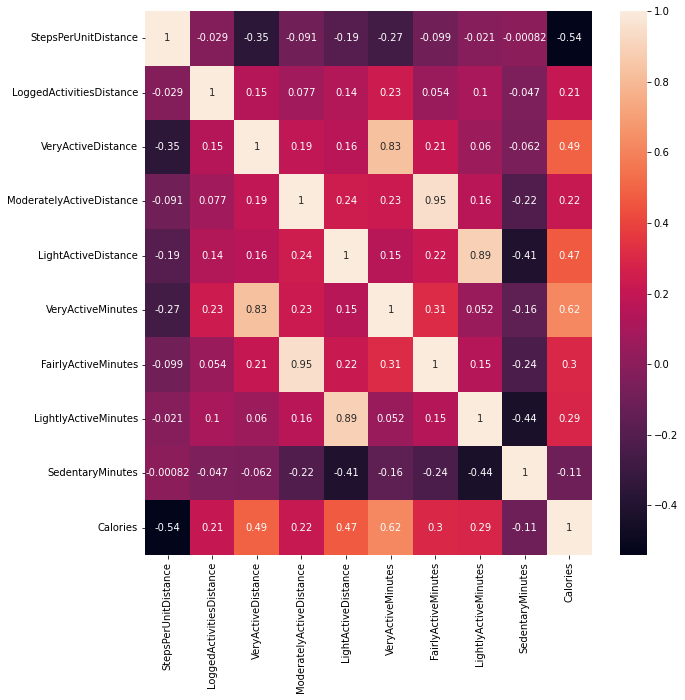

In [27]:
# New heatmap with the new variable
plt.figure(figsize=(10,10))

# Heatmap object
sns.heatmap(new_da.corr(), annot=True)

# Show figure
plt.show()

### Visualizations of Distributions

### Predictor Variables

There are 9 predictor variables in this data:
- Logged Activities Distance
- Very Active Distance
- Moderately Active Distance
- Light Active Distance
- Very Active Minutes
- Fairly Active Minutes
- Lightly Active Minutes
- Sedentary Minutes
- Steps per Unit Distance

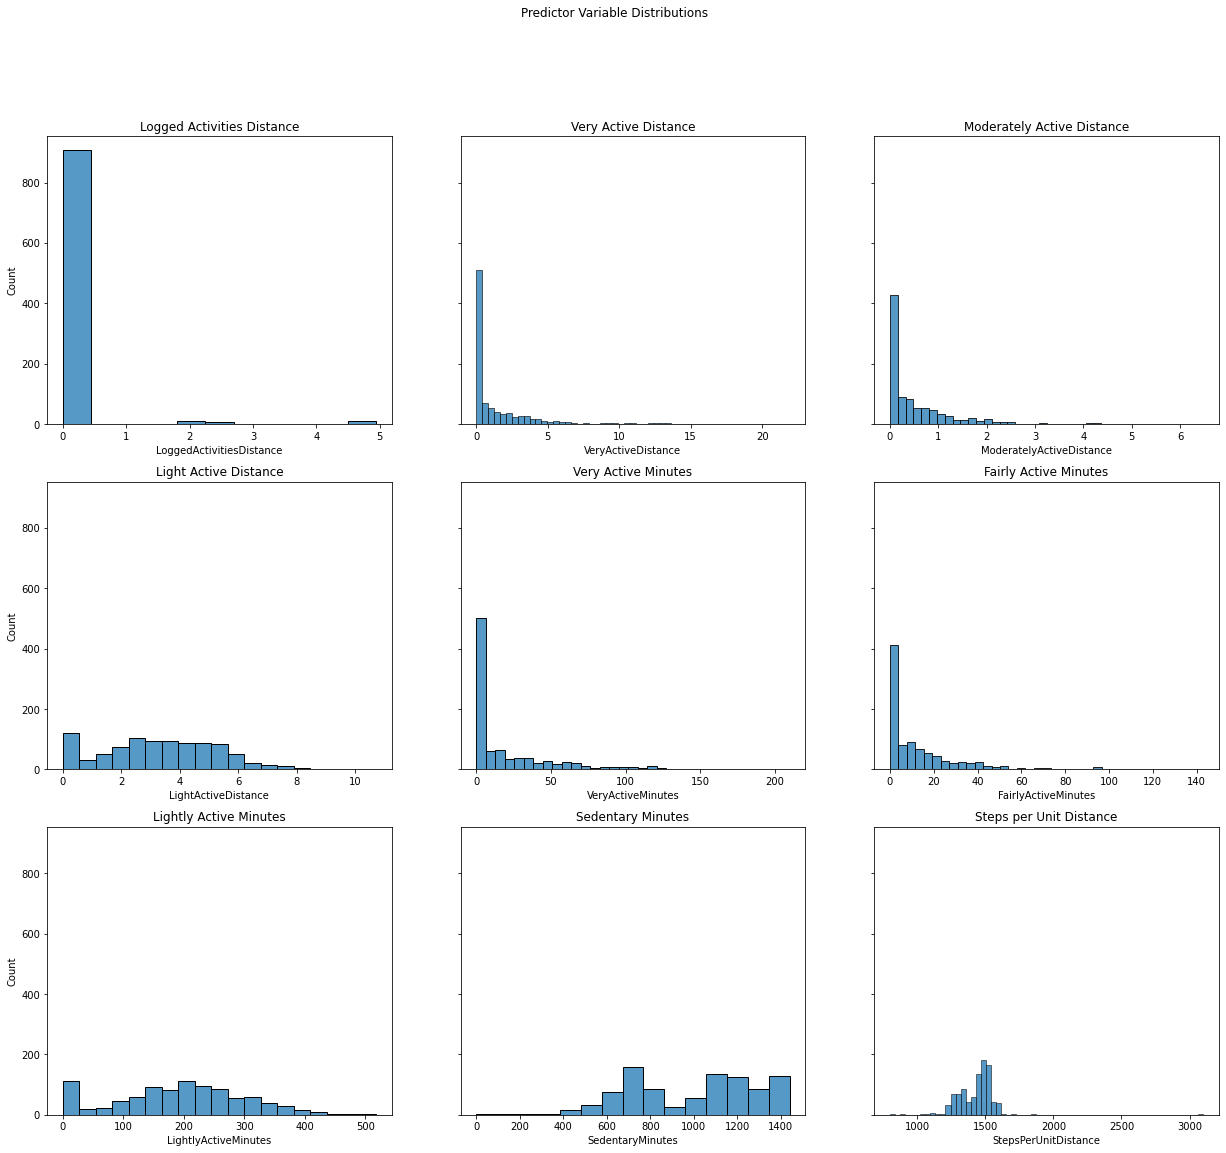

In [28]:
# Visualize predictor variables
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3,3, sharey = True, figsize = (21,18))

# Titles
plt.suptitle('Predictor Variable Distributions')
ax0.set_title('Logged Activities Distance')
ax1.set_title('Very Active Distance')
ax2.set_title('Moderately Active Distance')
ax3.set_title('Light Active Distance')
ax4.set_title('Very Active Minutes')
ax5.set_title('Fairly Active Minutes')
ax6.set_title('Lightly Active Minutes')
ax7.set_title('Sedentary Minutes')
ax8.set_title('Steps per Unit Distance')

# Visualizations
ax0 = sns.histplot(x='LoggedActivitiesDistance', data=X, ax=ax0)
ax1 = sns.histplot(x='VeryActiveDistance', data=X, ax=ax1)
ax2 = sns.histplot(x='ModeratelyActiveDistance', data=X, ax=ax2)
ax3 = sns.histplot(x='LightActiveDistance', data=X, ax=ax3)
ax4 = sns.histplot(x='VeryActiveMinutes', data=X, ax=ax4)
ax5 = sns.histplot(x='FairlyActiveMinutes', data=X, ax=ax5)
ax6 = sns.histplot(x='LightlyActiveMinutes', data=X, ax=ax6)
ax7 = sns.histplot(x='SedentaryMinutes', data=X, ax=ax7)
ax8 = sns.histplot(x='StepsPerUnitDistance', data=X, ax=ax8)

In [29]:
# Describe the predictor variables
X.describe()

,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,StepsPerUnitDistance
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.108171,1.502681,0.567543,3.340819,21.164894,13.564894,192.812766,991.210638,1431.936095
std,0.619897,2.658941,0.883580,2.040655,32.844803,19.987404,109.174700,301.267437,136.525987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000018
25%,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,127.000000,729.750000,1327.743668
50%,0.000000,0.210000,0.240000,3.365000,4.000000,6.000000,199.000000,1057.500000,1467.244117
75%,0.000000,2.052500,0.800000,4.782500,32.000000,19.000000,264.000000,1229.500000,1511.019426
max,4.942142,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,3100.000069


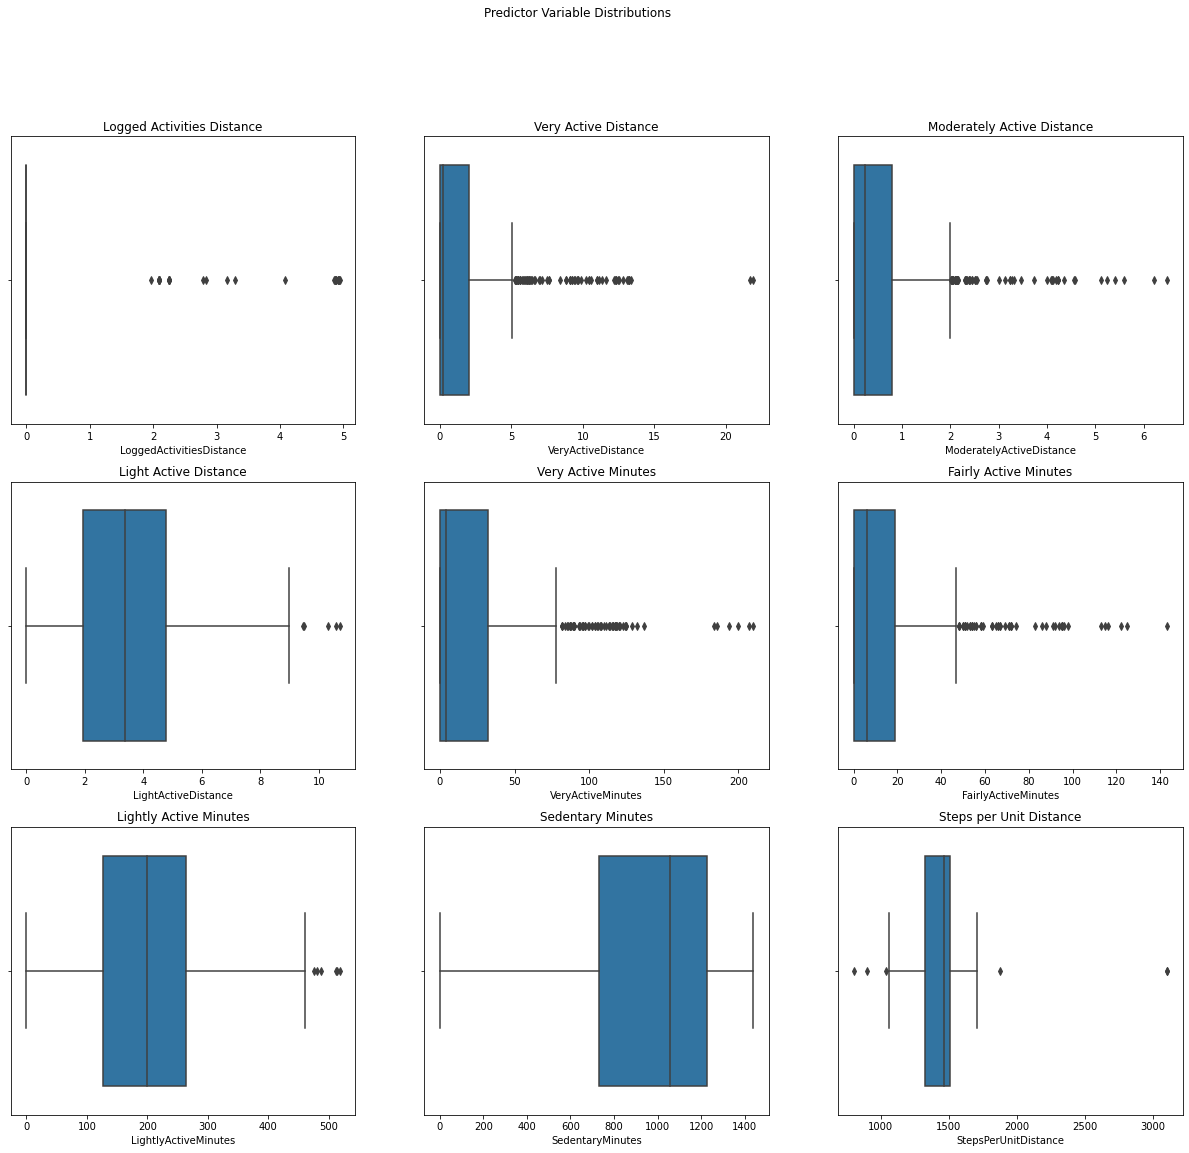

In [30]:
# Box plots
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3,3, sharey = True, figsize = (21,18))

# Titles
plt.suptitle('Predictor Variable Distributions')
ax0.set_title('Logged Activities Distance')
ax1.set_title('Very Active Distance')
ax2.set_title('Moderately Active Distance')
ax3.set_title('Light Active Distance')
ax4.set_title('Very Active Minutes')
ax5.set_title('Fairly Active Minutes')
ax6.set_title('Lightly Active Minutes')
ax7.set_title('Sedentary Minutes')
ax8.set_title('Steps per Unit Distance')

# Visualizations
ax0 = sns.boxplot(x=X['LoggedActivitiesDistance'], ax = ax0)
ax1 = sns.boxplot(x=X['VeryActiveDistance'], ax=ax1)
ax2 = sns.boxplot(x=X['ModeratelyActiveDistance'], ax=ax2)
ax3 = sns.boxplot(x=X['LightActiveDistance'], ax=ax3)
ax4 = sns.boxplot(x=X['VeryActiveMinutes'], ax=ax4)
ax5 = sns.boxplot(x=X['FairlyActiveMinutes'], ax=ax5)
ax6 = sns.boxplot(x=X['LightlyActiveMinutes'], ax=ax6)
ax7 = sns.boxplot(x=X['SedentaryMinutes'], ax=ax7)
ax8 = sns.boxplot(x=X['StepsPerUnitDistance'], ax=ax8)

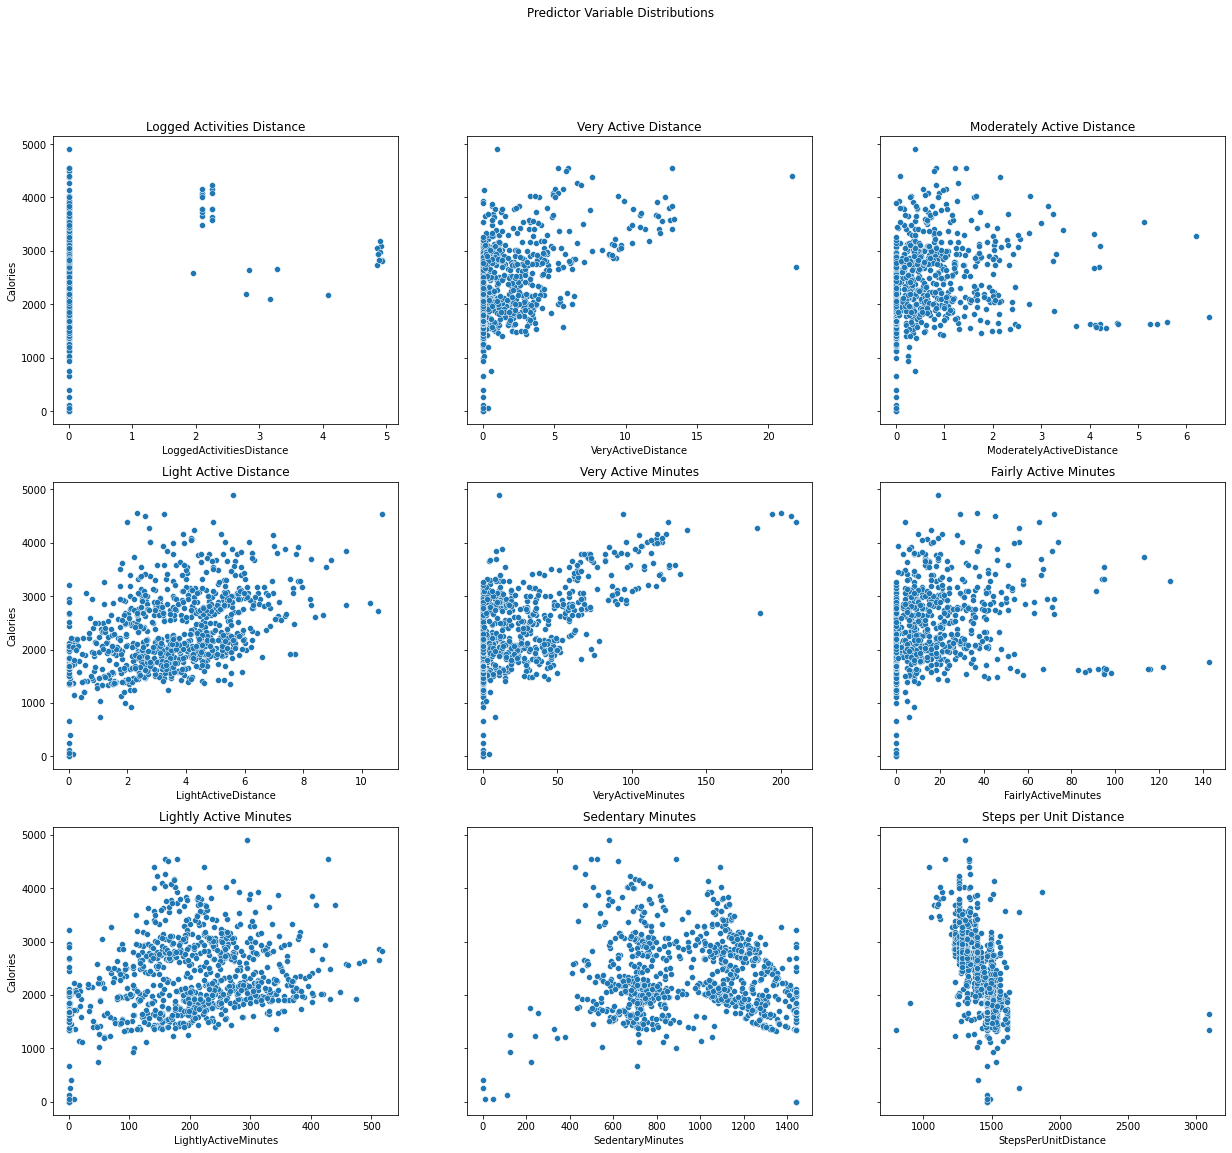

In [31]:
# Scatterplots: IV v. DV
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3,3, sharey = True, figsize = (21,18))

# Titles
plt.suptitle('Predictor Variable Distributions')
ax0.set_title('Logged Activities Distance')
ax1.set_title('Very Active Distance')
ax2.set_title('Moderately Active Distance')
ax3.set_title('Light Active Distance')
ax4.set_title('Very Active Minutes')
ax5.set_title('Fairly Active Minutes')
ax6.set_title('Lightly Active Minutes')
ax7.set_title('Sedentary Minutes')
ax8.set_title('Steps per Unit Distance')

# Visualizations
ax0 = sns.scatterplot(data = new_da, x='LoggedActivitiesDistance', y = 'Calories', ax = ax0)
ax1 = sns.scatterplot(data = new_da, x='VeryActiveDistance', y = 'Calories', ax=ax1)
ax2 = sns.scatterplot(data = new_da, x='ModeratelyActiveDistance', y = 'Calories', ax=ax2)
ax3 = sns.scatterplot(data = new_da, x='LightActiveDistance', y = 'Calories', ax=ax3)
ax4 = sns.scatterplot(data = new_da, x='VeryActiveMinutes', y = 'Calories', ax=ax4)
ax5 = sns.scatterplot(data = new_da, x='FairlyActiveMinutes', y = 'Calories', ax=ax5)
ax6 = sns.scatterplot(data = new_da, x='LightlyActiveMinutes', y = 'Calories', ax=ax6)
ax7 = sns.scatterplot(data = new_da, x='SedentaryMinutes', y = 'Calories', ax=ax7)
ax8 = sns.scatterplot(data = new_da, x='StepsPerUnitDistance', y = 'Calories', ax=ax8)

### Dependent Variable

Calories is the only dependent variable in this data set.

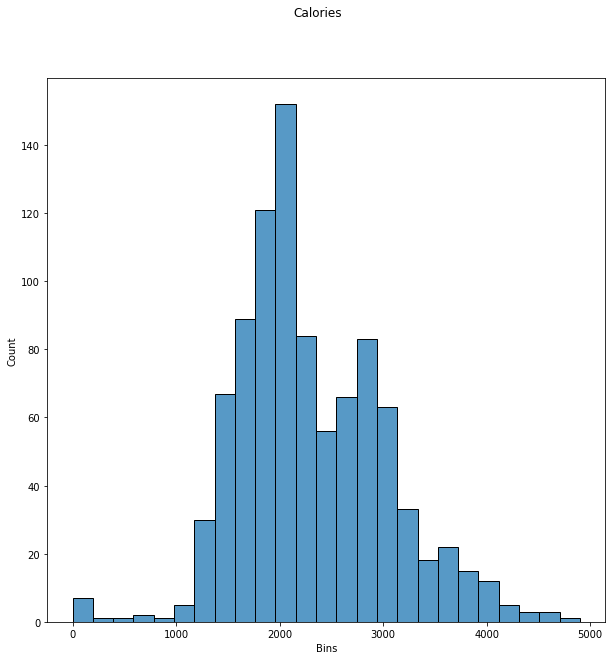

In [32]:
# Distribution of dependent variable
plt.figure(figsize=(10,10))
plt.suptitle('Calories')
plt.xlabel('Bins')
plt.ylabel('Count')
sns.histplot(x = y, data = y)
plt.show()

In [33]:
# Dependent variable description
y.describe()

count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64

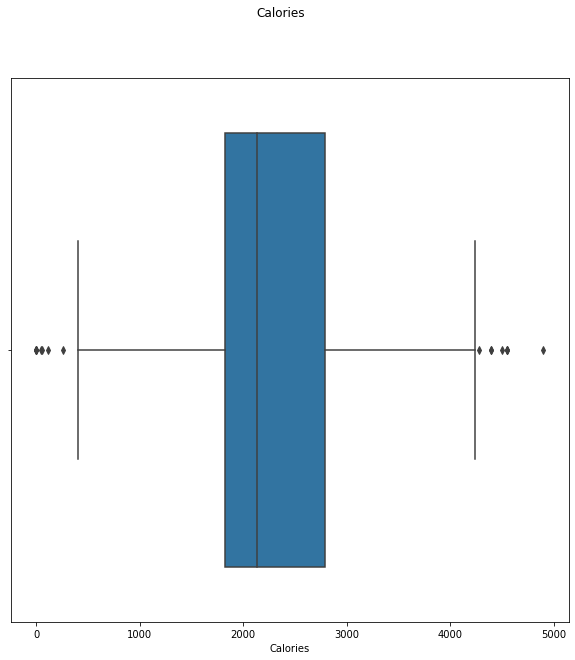

In [34]:
# Distribution of dependent variable
plt.figure(figsize=(10,10))
plt.suptitle('Calories')
sns.boxplot(x = y)
plt.show()

## Linear Regression

In [35]:
# Initialize a StandardScaler object
sc = StandardScaler()

In [36]:
# Fit the scaler to the predictor variables
X_scld = sc.fit_transform(X)

# Check
X_scld

array([[-0.17459128,  0.14198133, -0.0198645 , ...,  1.2389244 ,
        -0.87414278,  0.85402443],
       [-0.17459128,  0.02533153,  0.1386661 , ...,  0.22166408,
        -0.71473109,  0.79320969],
       [-0.17459128,  0.35270362, -0.18971873, ..., -0.10825818,
         0.75318492,  0.87936824],
       ...,
       [-0.17459128, -0.05745223, -0.12177704, ...,  0.28581564,
         0.65023154, -0.84280466],
       [-0.17459128,  4.40910734, -0.17839512, ...,  0.18500606,
         0.45096692, -2.4685656 ],
       [-0.17459128,  0.11940397, -0.59736888, ..., -0.5114965 ,
        -0.73465755, -0.8375684 ]])

In [37]:
# Split the data
X_scld_train, X_scld_test, y_train, y_test = train_test_split(X_scld, y, test_size=.20, random_state=42)

In [38]:
# Check
print(X_scld_train.shape)
print(X_scld_test.shape)
print(y_train.shape)
print(y_test.shape)

(752, 9)
(188, 9)
(752,)
(188,)


In [39]:
# Initialize the LinearRegression object
linreg = LinearRegression()

In [40]:
# Fit the model
linreg.fit(X_scld_train, y_train)

# Make predictions
y_lr_preds = linreg.predict(X_scld_test)

### Regression Plots per Predictor Variable

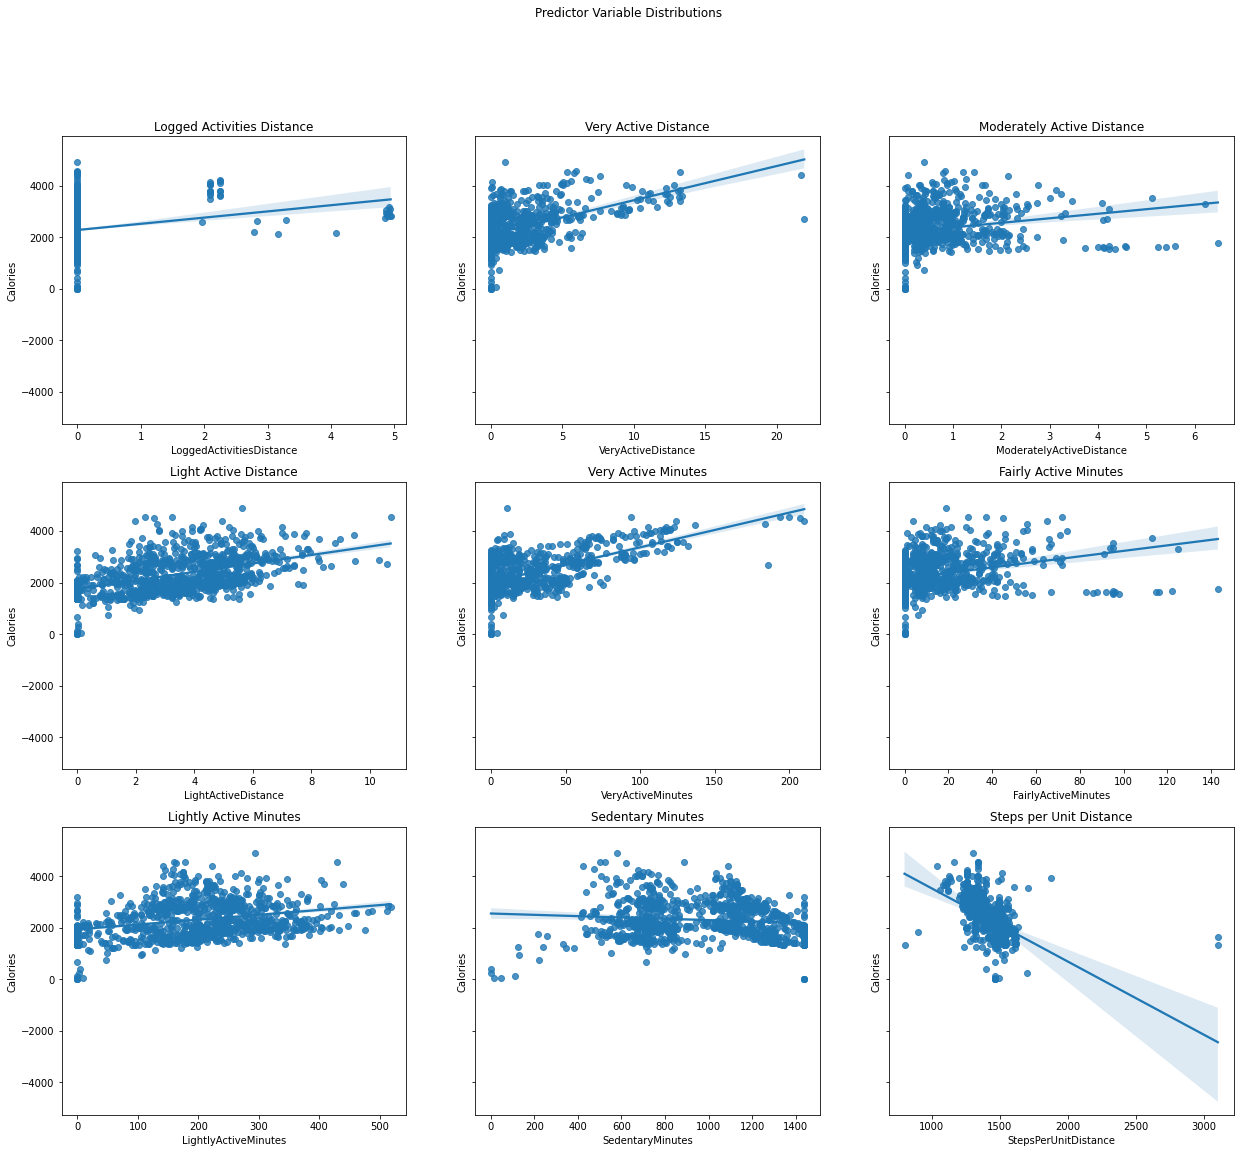

In [41]:
# Visualize the regression model - training data
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3,3, sharey = True, figsize = (21,18))

# Titles
plt.suptitle('Predictor Variable Distributions')
ax0.set_title('Logged Activities Distance')
ax1.set_title('Very Active Distance')
ax2.set_title('Moderately Active Distance')
ax3.set_title('Light Active Distance')
ax4.set_title('Very Active Minutes')
ax5.set_title('Fairly Active Minutes')
ax6.set_title('Lightly Active Minutes')
ax7.set_title('Sedentary Minutes')
ax8.set_title('Steps per Unit Distance')

# Visualizations
ax0 = sns.regplot(data = new_da, x='LoggedActivitiesDistance', y = 'Calories', ax = ax0)
ax1 = sns.regplot(data = new_da, x='VeryActiveDistance', y = 'Calories', ax=ax1)
ax2 = sns.regplot(data = new_da, x='ModeratelyActiveDistance', y = 'Calories', ax=ax2)
ax3 = sns.regplot(data = new_da, x='LightActiveDistance', y = 'Calories', ax=ax3)
ax4 = sns.regplot(data = new_da, x='VeryActiveMinutes', y = 'Calories', ax=ax4)
ax5 = sns.regplot(data = new_da, x='FairlyActiveMinutes', y = 'Calories', ax=ax5)
ax6 = sns.regplot(data = new_da, x='LightlyActiveMinutes', y = 'Calories', ax=ax6)
ax7 = sns.regplot(data = new_da, x='SedentaryMinutes', y = 'Calories', ax=ax7)
ax8 = sns.regplot(data = new_da, x='StepsPerUnitDistance', y = 'Calories', ax=ax8)

### Model Performance

In [42]:
# R-Squared
linreg_r2 = r2_score(y_test, y_lr_preds)
print(f"The R^2 of this model is {linreg_r2}. This indicates that this model can explain 59.28% of the variance in the model.")

# Model score
linreg_score = linreg.score(X_scld_train, y_train)
print(f"The score for this model is {linreg_score}. This says that the mean accuracy of the predictions in this model is 70.49%.")

The R^2 of this model is 0.5928129304776997. This indicates that this model can explain 59.28% of the variance in the model.
The score for this model is 0.7048604413304856. This says that the mean accuracy of the predictions in this model is 70.49%.


In [43]:
# Measures of error loss in the model: mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MAE- average of all absolute error
linreg_mae = mean_absolute_error(y_test, y_lr_preds)
print(f"Mean Absolute Error: {linreg_mae}.") # Fairly high

# MSE- average of the squared residuals; how close the regression line is to the points
linreg_mse = mean_squared_error(y_test, y_lr_preds, squared = True) # Should be relatively high, so not the greatest predictor
print(f"Mean Squared Error: {linreg_mse}.")

# MAPE- average accuracy over time periods
linreg_mape = mean_absolute_percentage_error(y_test, y_lr_preds)
print(f"Mean Absolute Percentage Error: {linreg_mape}.") # ~4% so not very high.

Mean Absolute Error: 301.16980515106764.
Mean Squared Error: 192466.72554231147.
Mean Absolute Percentage Error: 4.111803468566774e+16.


## XGBoost + Grid Search + KFold

The linear regression model above performed only slightly better than chance. There are other prediction algorithms to try that may offer better results.

In [44]:
# New imports
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from xgboost import XGBRegressor, plot_tree

In [45]:
# Parameters for the analysis
# Folds for KFold
folds=5

# Estimators for XGBRegressor
n_estimators = 300

#XGBRegressor parameters
params={'learning_rate': [0.03, 0.01, 0.001],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

In [46]:
# Initialize KFold
kf = KFold(n_splits=folds, shuffle=True, random_state=101)

# Initialize XGBRegressor
xgbr = XGBRegressor(n_estimators=n_estimators, verbosity = 1)

# Initialize RandomSearchCV
rs = RandomizedSearchCV(xgbr, param_distributions = params, n_jobs=3, cv=kf.split(X,y), verbose=1, random_state=101)

In [47]:
# Fit the RandomizedSearch object
rs.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f43ff32a250>,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_co...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          

In [48]:
# Get the list of parameters and their performance
xgbr_results = pd.DataFrame(rs.cv_results_)

# View
xgbr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.059439,0.190894,0.007199,0.001264,1.0,4,0.03,1.5,0.8,"{'subsample': 1.0, 'max_depth': 4, 'learning_r...",0.825091,0.817205,0.785636,0.856933,0.809315,0.818836,0.023178,2
1,1.044600,0.189711,0.007861,0.001803,0.8,5,0.01,1,0.6,"{'subsample': 0.8, 'max_depth': 5, 'learning_r...",0.779637,0.725741,0.750710,0.770690,0.735495,0.752455,0.020375,3
2,1.135428,0.072769,0.008129,0.001395,1.0,5,0.01,2,0.6,"{'subsample': 1.0, 'max_depth': 5, 'learning_r...",0.777438,0.724323,0.750518,0.772694,0.736379,0.752271,0.020431,4
3,1.112338,0.207539,0.007322,0.001346,0.8,5,0.001,1.5,1.0,"{'subsample': 0.8, 'max_depth': 5, 'learning_r...",-5.152315,-5.966115,-5.685150,-4.585391,-6.203367,-5.518468,0.583431,9
4,1.005896,0.166137,0.006778,0.001510,0.6,3,0.01,2,1.0,"{'subsample': 0.6, 'max_depth': 3, 'learning_r...",0.761419,0.692072,0.744948,0.748649,0.720020,0.733422,0.024649,5
5,1.133484,0.097324,0.007862,0.001124,1.0,3,0.001,1.5,1.0,"{'subsample': 1.0, 'max_depth': 3, 'learning_r...",-5.149684,-5.949884,-5.718316,-4.572846,-6.201089,-5.518364,0.586896,8
6,0.990535,0.204761,0.007786,0.001441,1.0,4,0.001,2,0.6,"{'subsample': 1.0, 'max_depth': 4, 'learning_r...",-5.160093,-5.993237,-5.745572,-4.587474,-6.256510,-5.548577,0.602053,10
7,1.030975,0.196387,0.007432,0.001207,0.6,3,0.01,1,1.0,"{'subsample': 0.6, 'max_depth': 3, 'learning_r...",0.761419,0.692072,0.744948,0.748649,0.720020,0.733422,0.024649,5
8,1.024958,0.163138,0.008221,0.001172,0.6,4,0.03,2,1.0,"{'subsample': 0.6, 'max_depth': 4, 'learning_r...",0.830221,0.824816,0.793111,0.859400,0.811243,0.823758,0.021951,1
9,1.036247,0.202499,0.006852,0.001156,0.8,4,0.001,0.5,1.0,"{'subsample': 0.8, 'max_depth': 4, 'learning_r...",-5.151257,-5.966492,-5.685062,-4.585292,-6.203589,-5.518338,0.583701,7


In [49]:
# Find the best estimator
rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
# Find the best parameters - Can all be found from rank_test_score of 1
rs.best_params_

{'subsample': 0.6,
 'max_depth': 4,
 'learning_rate': 0.03,
 'gamma': 2,
 'colsample_bytree': 1.0}

The best parameters can now be used to find predictions, and then compared to the linear regression model.

In [51]:
# Predictions
y_xgbr_preds = rs.predict(X)

In [52]:
# Score
rs.score(X, y)

0.919819556411608

In [53]:
# Cross validation scores
xgbr_crossval = cross_val_score(xgbr, X, y, scoring='r2', cv=kf) 

print(f"The cross validation scores for the XGBRegressor model are: {xgbr_crossval}. The average R^2 for this model is {xgbr_crossval.mean()}.")

The cross validation scores for the XGBRegressor model are: [0.79795502 0.80335932 0.76857597 0.86488004 0.81542918]. The average R^2 for this model is 0.8100399041350836.


The XGBRegressor model found via Randomized Grid Search and using KFold has produced a jump in model accuracy, as well as in the ability of the model to account for variance observed in the model.

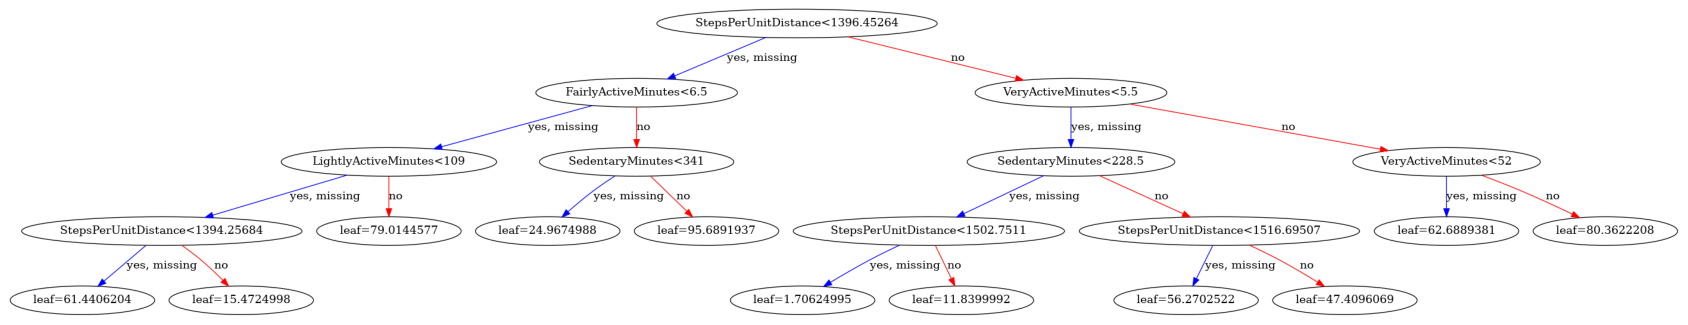

In [54]:
# Visualization of the XGBRegressor
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(rs.best_estimator_, ax = ax)
plt.show()